# Classification using Linear Regression

In this example, we will look at how to perform classification using linear regression. Let us start with a binary classification task.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets

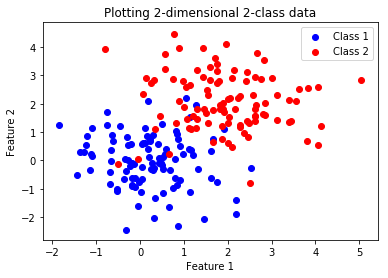

In [18]:
def generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov):
    
    np.random.seed(1)
    class1x = np.random.multivariate_normal(class1Mean, class1Cov, 100)
    class1y = np.zeros(100)
    class2x = np.random.multivariate_normal(class2Mean, class2Cov, 100)
    class2y = np.ones(100)
    x = np.concatenate((class1x, class2x), axis=0)
    y = np.concatenate((class1y, class2y))

    # Plotting the 2-class data
    plt.title('Plotting 2-dimensional 2-class data')
    plt.scatter(class1x[:,0], class1x[:,1], color = 'b', label = 'Class 1')
    plt.scatter(class2x[:,0], class2x[:,1], color = 'r', label = 'Class 2')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    
    return x,y

class1Mean = [0, 0]
class1Cov = [[1, 0], [0,1]]

class2Mean = [2, 2]
class2Cov = [[1, 0], [0,1]]

X,y = generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov)

To find the parameters of the regression line, we solve the normal equation.

$\hat{\beta} = (X^TX)^{-1}X^Ty$

The estimated response vector is then $\hat{y} = X\hat{\beta}$. To make this a classifier, we threshold at $\hat{y} = 0.5$

$\hat{g} =$
$
    \begin{cases}
      1, & \text{if}\ y > 0.5 \\
      0, & \text{if}\ y \le 0.5
    \end{cases}
$

In [19]:
def linear_regression_fit(X,y):
    
    # Add column of ones to the dataset - attribute x_0    
    X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)          
    
    # Normal equation 
    # beta = (X^T * X)^-1 * X^T * y
    
    X_transpose = np.transpose(X)
    beta = np.linalg.inv(X_transpose.dot(X))
    beta = beta.dot(X_transpose)
    beta = beta.dot(y)
    return beta

def predict_binary(beta, X):

    # Add column of ones to the dataset - attribute x_0    
    X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)     
    y_estimated = X.dot(beta)
    print(y_estimated)
    y_estimated = (y_estimated > 0.5).astype(int)
    return y_estimated

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X,y)
beta = linear_regression_fit(X_train,y_train)
y_pred = predict_binary(beta,X_test)
print(y_pred)
print(y_test)

[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071]
 [-0.3224172  -0.38405435]
 [ 1.13376944 -1.09989127]
 [-0.17242821 -0.87785842]
 [ 0.04221375  0.58281521]
 [-1.10061918  1.14472371]
 [ 0.90159072  0.50249434]
 [ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]
 [-0.69166075 -0.39675353]
 [-0.6871727  -0.84520564]
 [-0.67124613 -0.0126646 ]
 [-1.11731035  0.2344157 ]
 [ 1.65980218  0.74204416]
 [-0.19183555 -0.88762896]
 [-0.74715829  1.6924546 ]
 [ 0.05080775 -0.63699565]
 [ 0.19091548  2.10025514]
 [ 0.12015895  0.61720311]
 [ 0.30017032 -0.35224985]
 [-1.1425182  -0.34934272]
 [-0.20889423  0.58662319]
 [ 0.83898341  0.93110208]
 [ 0.28558733  0.88514116]
 [-0.75439794  1.25286816]
 [ 0.51292982 -0.29809284]
 [ 0.48851815 -0.07557171]
 [ 1.13162939  1.51981682]
 [ 2.18557541 -1.39649634]
 [-1.44411381 -0.50446586]
 [ 0.16003707  0.87616892]
 

[-0.82140837 -0.81812498 -0.8148416  ...  1.95025373  1.95353711
  1.9568205 ]


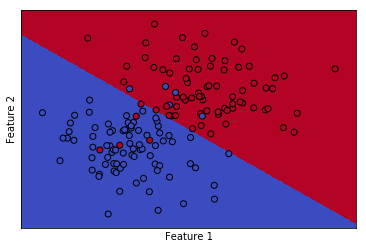

In [21]:
cmap = plt.cm.coolwarm
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = predict_binary(beta, np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=cmap)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Multiclass classification using linear regression

Let's now perform multiclass classification on the Iris dataset, using the first two features.

In [10]:
data = pd.read_csv("data/iris.csv")
# Take the first two features
X = data.values[:,:2].astype(float)
# The last column of this dataset gives the label
y = data.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
data.head()

sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

We create an encoded dataset by converting each label in $y$ into a vector. 

For each $y_i$, $y_{ik} =$
$
    \begin{cases}
      1, & \text{if}\ g_i = k \\
      0, & \text{if}\ g_i \ne k
    \end{cases}
$

In [11]:
y_labels, y_train = np.unique(y_train, return_inverse=True)
print(y_train)

[2 2 0 0 1 1 2 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1
 2 2 0 1 1 2 0 2 1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0
 0 1 2 0 0 1 1 1 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1
 1 2 2 1 0 1 1 2 2]


In [28]:
y_encoded = np.eye(3)[y_train]
_, y_test = np.unique(y_test, return_inverse=True)
print(y_encoded)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0.

We can solve for each $y_{ik}$ seperately to estimate the classifiers $\hat{f}_k$ - one for each class. We then get our multiclass classifier as follows.

$ \hat{G} = argmax_k \hat{f}_k$

In [29]:
beta = linear_regression_fit(X_train,y_encoded)

[[ 0.78573628  1.73122955 -1.51696583]
 [-0.37130589  0.01916875  0.35213715]
 [ 0.55966672 -0.4857443  -0.07392243]]


In [12]:
def predict_multiclass(beta, X):

    # Add column of ones to the dataset - attribute x_0    
    X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)  
    
    y_k = X.dot(beta)
    y_k = np.argmax(y_k,axis=1)
    return y_k

y_pred = predict_multiclass(beta,X_test)

AxisError: axis 1 is out of bounds for array of dimension 1

Let us look at the classification boundary.

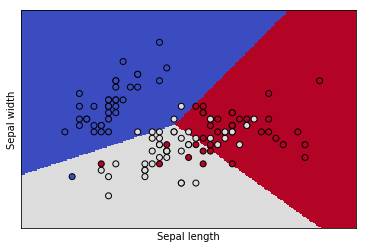

In [32]:
# Plot the results

cmap = plt.cm.coolwarm
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = predict_multiclass(beta, np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=cmap)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()